In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
train_df = pd.read_csv("C:/Users/rd357/Downloads/train (1).csv")
test_df = pd.read_csv("C:/Users/rd357/Downloads/test (1).csv")

In [7]:
print("Training Data:")
print(train_df.head())

Training Data:
   ID     crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0   1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1   2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2   4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
3   5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
4   7  0.08829  12.5   7.87     0  0.524  6.012  66.6  5.5605    5  311   

   ptratio   black  lstat  medv  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     18.7  394.63   2.94  33.4  
3     18.7  396.90   5.33  36.2  
4     15.2  395.60  12.43  22.9  


In [8]:
print("Test Data:")
print(test_df.head())

Test Data:
   ID     crim    zn  indus  chas    nox     rm    age     dis  rad  tax  \
0   3  0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242   
1   6  0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222   
2   8  0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311   
3   9  0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311   
4  10  0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311   

   ptratio   black  lstat  
0     17.8  392.83   4.03  
1     18.7  394.12   5.21  
2     15.2  396.90  19.15  
3     15.2  386.63  29.93  
4     15.2  386.71  17.10  


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

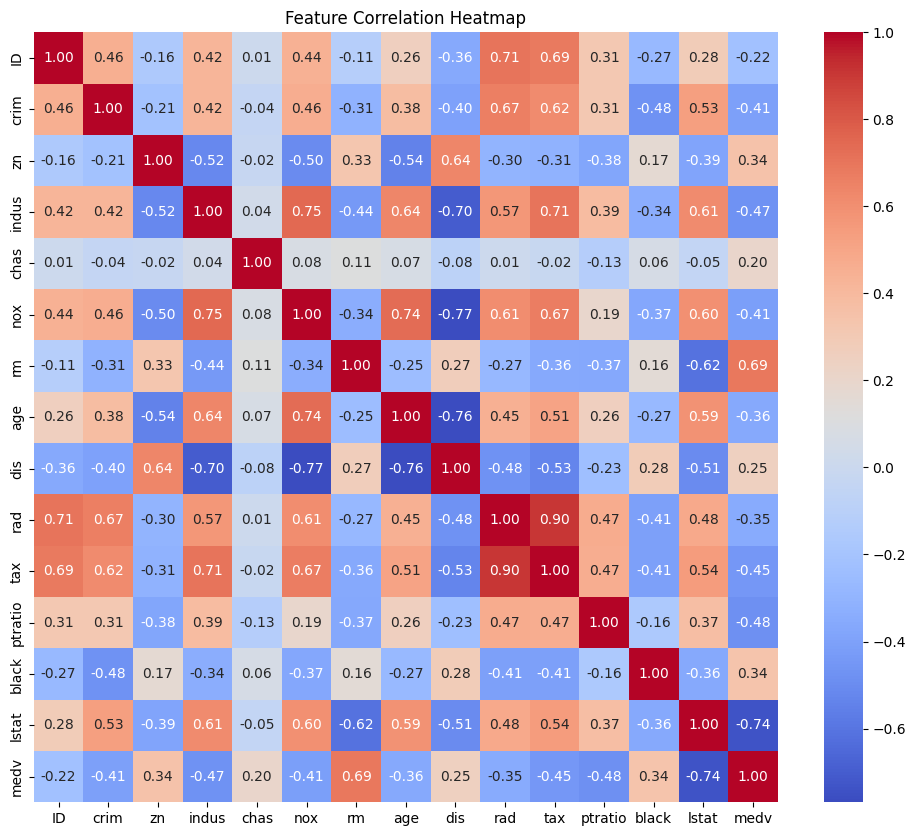

In [24]:
plt.figure(figsize=(12, 10))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [25]:
X_train = train_df.drop(columns=["ID", "medv"])  
y_train = train_df["medv"] 

In [26]:
X_test = test_df.drop(columns=["ID"])

In [27]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [29]:
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)


In [30]:
print("MODEL PERFORMANCE")
print(f"Training RMSE: {train_rmse:.3f}")
print(f"Training MAE: {train_mae:.3f}")
print(f"Training R²: {train_r2:.3f}")

MODEL PERFORMANCE
Training RMSE: 4.732
Training MAE: 3.297
Training R²: 0.733


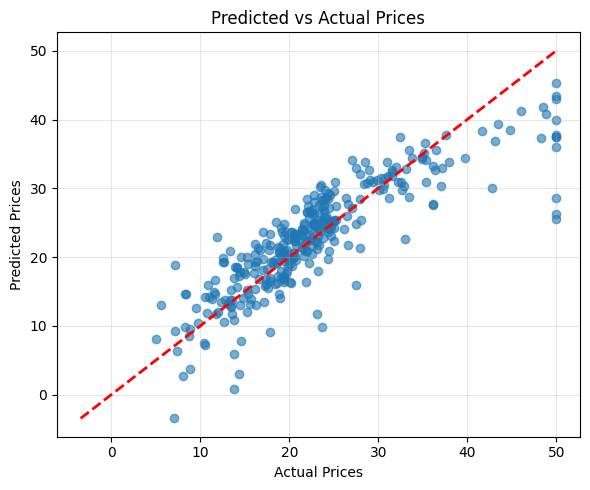

In [39]:
plt.figure(figsize=(6, 5))
plt.scatter(y_train, y_train_pred, alpha=0.6)

# Reference diagonal (perfect prediction line)
line_start = min(y_train.min(), y_train_pred.min())
line_end = max(y_train.max(), y_train_pred.max())
plt.plot([line_start, line_end], [line_start, line_end], 'r--', lw=2)

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
